# Problem 1 (8 pts)*
## Steepest Gradient Descent Method and Newton Method

### Dataset Creation

In [ ]:
import math
import random
import numpy as np
# rand(n, 4)はn行4列の行列を返しているらしい

n = 200
x = np.array([[3 * (random.random() - 0.5) for _ in range(4)] for _ in range(n)])
y = [2 * x[i][0] - 1 * x[i][1] + 0.5 + 0.5 * random.random()  for i in range(n)]
y = np.array([[1] if y[i] > 0 else [-1] for i in range(n)])


### LogisticRegressor

In [ ]:
class LogisticRegressor:
  def __init__(self, x, y, lam):
    self.x = x
    self.y = y
    self.lam = lam
  
  def fn(self, w):
    return sum([math.log(1 + math.exp(-self.y[i] * w.T @ self.x[i])) for i in range(self.x.shape[0])]) + self.lam * w.T @ w
  
  def d_fn(self, w):
    return sum([math.exp(-self.y[i] * w.T @ x[i]) / (1 + math.exp(-self.y[i] * w.T @ self.x[i])) * -self.y[i] * self.x[i] for i in range(self.x.shape[0])]) + self.lam * w
  
  def hesse(self, w):
    hesse =  sum([math.exp(-self.y[i] * w.T @ x[i]) / ((1 + math.exp(-self.y[i] * w.T @ self.x[i]))**2) * self.x[i] * self.x[i].T for i in range(self.x.shape[0])]) + 2 * self.lam * np.identity(self.x.shape[1])
    return np.array(hesse)


### SGD

In [ ]:
class SGD:
  def __init__(self, w_init, lr):
    self.w = w_init
    self.lr = lr
    self.shape = self.w.shape
  
  def step(self, fn, d_fn, step):
    loss = []
    for i in range(step+1):
      loss.append(fn(self.w))
      self.update(d_fn)
      if i % 1000 == 0:
        print("Step {}: loss -> {}".format(i, loss[-1]))
    return loss

  def step_n(self, fn, d_fn, hesse, iter_num):
    loss = []
    for i in range(iter_num+1):
      loss.append(fn(self.w))
      self.update_newton(d_fn, hesse)
      if i % 1000 == 0:
        print("Step {}: loss -> {}".format(i, loss[-1]))
    return loss
  
  def update(self, d_fn):
    self.w = self.w - self.lr * d_fn(self.w)
  
  def update_newton(self, d_fn, hesse):
    self.w = self.w - self.lr * np.linalg.inv(hesse(self.w)) @ d_fn(self.w)
    assert self.w.shape == self.shape

In [ ]:
# regressor
logreg = LogisticRegressor(x, y, 0.02)
# params
w_init = np.array([random.random() for _ in range(x.shape[1])])
iter_num = 501
# sgd
sgd = SGD(w_init, lr=5e-5)
sgd_n = SGD(w_init, lr=5e-5)
# calc loss
loss = sgd.step(logreg.fn, logreg.d_fn, iter_num)
loss_n = sgd_n.step_n(logreg.fn, logreg.d_fn, logreg.hesse, iter_num)

Step 0: loss -> 152.9996751703201
Step 0: loss -> 152.9996751703201


### log

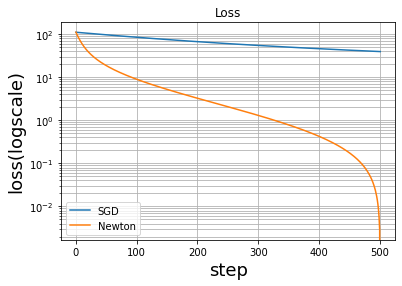

In [ ]:
import matplotlib.pyplot as plt

graph_x = range(iter_num+1)
graph_y = loss
graph_y_n = loss_n

Jw_hat = min(min(loss), min(loss_n))

plt.title('Loss') 
plt.xlabel('step',fontsize=18)
plt.ylabel('loss(logscale)',fontsize=18)
plt.yscale('log')
plt.grid(which="both")
plt.plot(graph_x, graph_y - Jw_hat, label="SGD")
plt.plot(graph_x, graph_y_n - Jw_hat, label="Newton")
plt.plot()
plt.legend()
plt.show()

# Problem 2
## Proximal Gradient Method

In [ ]:
import random
import numpy as np
from numpy import linalg as la
import math

class LinearRegression:
  def __init__(self, mu, A, lam):
    # self.w = np.array([[10], [10]])
    # self.u = np.array([[1], [2]])
    # self.A = np.array([[3, 0.5], [0.5, 1]])
    self.mu = mu
    self.A = A
    self.lam = lam

  def objective(self, w):
    return (w - self.mu).T @ self.A @ (w - self.mu) + self.lam * la.norm(w, 1)

  def d_fn(self, w):
    return 2 * self.A @ (w - self.mu)

class LassoPG:
  def __init__(self, w, A, lam):
    self.w = w 
    self.eta = 1 / max(la.eig(2 * A)[0])
    self.lam = lam

  def step(self, objective, d_fn, iter_num):
    loss = []
    for _ in range(iter_num):
      self.w = self.prox(self.w - self.eta * d_fn(self.w))
      loss.append(objective(self.w)[0][0])
      # print("loss:", self.loss_fn())
    print("w:", self.w)
    return loss

  def prox(self, x):
    res = []
    for e in x:
      res.append([np.sign(e[0]) * max(0, e[0] - self.eta * self.lam)])
    return np.array(res)

w = np.array([[10], [10]])
mu = np.array([[1], [2]])
A = np.array([[3, 0.5], [0.5, 1]])
iter_num = 50
LR2 = LinearRegression(mu, A, lam=2)
LR4 = LinearRegression(mu, A, lam=4)
LR6 = LinearRegression(mu, A, lam=6)
lpg2 = LassoPG(w, LR2.A, LR2.lam)
lpg4 = LassoPG(w, LR4.A, LR4.lam)
lpg6 = LassoPG(w, LR6.A, LR6.lam)
loss_2 = lpg2.step(LR2.objective, LR2.d_fn, iter_num)
loss_4 = lpg4.step(LR4.objective, LR4.d_fn, iter_num)
loss_6 = lpg6.step(LR6.objective, LR6.d_fn, iter_num)

w: [[0.81818173]
 [1.09090947]]
w: [[0.63636354]
 [0.1818186 ]]
w: [[0.33333333]
 [0.        ]]


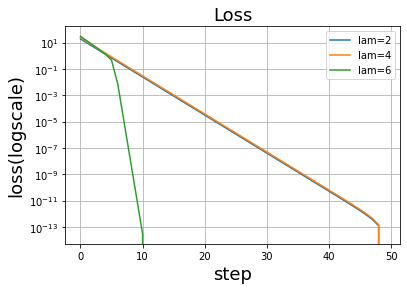

In [ ]:
import matplotlib.pyplot as plt

graph_x = range(iter_num)
graph_y2 = loss_2
graph_y4 = loss_4
graph_y6 = loss_6

plt.title('Loss',fontsize=18) 
plt.xlabel('step',fontsize=18)
plt.ylabel('loss(logscale)',fontsize=18)
plt.yscale('log')
plt.grid(which="both")
plt.plot(graph_x, graph_y2-min(loss_2), label="lam=2")
plt.plot(graph_x, graph_y4-min(loss_4), label="lam=4")
plt.plot(graph_x, graph_y6-min(loss_6), label="lam=6")
plt.legend()
plt.show()